In [9]:
""" dictionary records of current weather obs from UW ATG """

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
atg_obs = pd.read_csv('../../Downloads/LFEM_data-.csv', low_memory=False, skiprows=1)
atg_obs

,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
0,2.451390e+06,1999-07-30,00:09,62.200000,54.500000,75.9,6.600000,9.100000,317,M,223.6,0.00,0.00
1,2.451390e+06,1999-07-30,00:10,62.100000,54.100000,75.2,7.500000,12.000000,357,M,216.8,0.00,0.00
2,2.451390e+06,1999-07-30,00:11,61.500000,53.600000,75.2,6.600000,9.100000,9,M,212.6,0.00,0.00
3,2.451390e+06,1999-07-30,00:12,62.100000,54.300000,75.7,6.300000,9.100000,345,M,211.6,0.00,0.00
4,2.451390e+06,1999-07-30,00:13,62.600000,54.800000,75.4,4.700000,9.100000,336,M,213.2,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909355,2.460432e+06,2024-04-30,19:28,50.300000,37.100000,60.3,6.500000,7.800000,281,1015.7,269.7,967.67,0.00
12909356,2.460432e+06,2024-04-30,19:29,50.100000,37.100000,60.8,5.000000,7.900000,358,1015.7,280.3,967.67,0.00
12909357,2.460432e+06,2024-04-30,19:30,50.000000,37.300000,61.3,5.500000,7.400000,318,1015.7,295.8,967.67,0.00
12909358,2.460432e+06,2024-04-30,19:31,50.000000,37.100000,61.1,8.900000,10.700000,292,1015.6,315.4,967.67,0.00


In [3]:
atg_obs.insert(0, 'datetime_UTC', pd.to_datetime(atg_obs['Date'] + atg_obs['Time'], format='%Y-%m-%d%H:%M'))
atg_obs

,datetime_UTC,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
0,1999-07-30 00:09:00,2.451390e+06,1999-07-30,00:09,62.200000,54.500000,75.9,6.600000,9.100000,317,M,223.6,0.00,0.00
1,1999-07-30 00:10:00,2.451390e+06,1999-07-30,00:10,62.100000,54.100000,75.2,7.500000,12.000000,357,M,216.8,0.00,0.00
2,1999-07-30 00:11:00,2.451390e+06,1999-07-30,00:11,61.500000,53.600000,75.2,6.600000,9.100000,9,M,212.6,0.00,0.00
3,1999-07-30 00:12:00,2.451390e+06,1999-07-30,00:12,62.100000,54.300000,75.7,6.300000,9.100000,345,M,211.6,0.00,0.00
4,1999-07-30 00:13:00,2.451390e+06,1999-07-30,00:13,62.600000,54.800000,75.4,4.700000,9.100000,336,M,213.2,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909355,2024-04-30 19:28:00,2.460432e+06,2024-04-30,19:28,50.300000,37.100000,60.3,6.500000,7.800000,281,1015.7,269.7,967.67,0.00
12909356,2024-04-30 19:29:00,2.460432e+06,2024-04-30,19:29,50.100000,37.100000,60.8,5.000000,7.900000,358,1015.7,280.3,967.67,0.00
12909357,2024-04-30 19:30:00,2.460432e+06,2024-04-30,19:30,50.000000,37.300000,61.3,5.500000,7.400000,318,1015.7,295.8,967.67,0.00
12909358,2024-04-30 19:31:00,2.460432e+06,2024-04-30,19:31,50.000000,37.100000,61.1,8.900000,10.700000,292,1015.6,315.4,967.67,0.00


In [28]:
no_erros_obs = atg_obs.loc[(atg_obs['Rain']!='M')&(atg_obs['datetime_UTC']>=dt.datetime(2015,1,1))].copy()

In [29]:
no_erros_obs['Rain'] = no_erros_obs['Rain'].astype(float)

In [30]:
first_obs_each_hour = no_erros_obs.resample(on='datetime_UTC', rule='1H')

In [31]:
first_obs_each_hour['Rain']

In [32]:
first_obs_each_hour = first_obs_each_hour['Rain'].sum().reset_index()
first_obs_each_hour

,datetime_UTC,Rain
0,2015-01-01 00:00:00,0.0
1,2015-01-01 01:00:00,0.0
2,2015-01-01 02:00:00,0.0
3,2015-01-01 03:00:00,0.0
4,2015-01-01 04:00:00,0.0
...,...,...
81783,2024-04-30 15:00:00,0.0
81784,2024-04-30 16:00:00,0.0
81785,2024-04-30 17:00:00,0.0
81786,2024-04-30 18:00:00,0.0


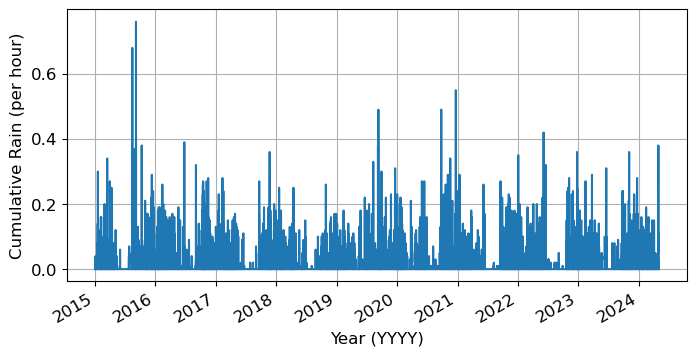

In [34]:
plt.figure(figsize=(8,4))
plt.rcParams.update({'font.size':12})
plt.plot(first_obs_each_hour['datetime_UTC'], first_obs_each_hour['Rain'])
plt.grid(which='both')
plt.ylabel('Cumulative Rain (per hour)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()
plt.show()